In [1]:
import math
import multiprocessing
import random
import sys
import time


def merge(*args):
    # Support explicit left/right args, as well as a two-item
    # tuple which works more cleanly with multiprocessing.
    left, right = args[0] if len(args) == 1 else args
    left_length, right_length = len(left), len(right)
    left_index, right_index = 0, 0
    merged = []
    while left_index < left_length and right_index < right_length:
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    if left_index == left_length:
        merged.extend(right[right_index:])
    else:
        merged.extend(left[left_index:])
    return merged


def merge_sort(data):
    length = len(data)
    if length <= 1:
        return data
    middle = int(length / 2)
    left = merge_sort(data[:middle])
    right = merge_sort(data[middle:])
    return merge(left, right)


def merge_sort_parallel(data, processes):
    # Creates a pool of worker processes, one per CPU core.
    # We then split the initial data into partitions, sized
    # equally per worker, and perform a regular merge sort
    # across each partition.
    #processes = multiprocessing.cpu_count()
    #print(processes)
    pool = multiprocessing.Pool(processes=processes)
    size = int(math.ceil(float(len(data)) / processes))
    data = [data[i * size:(i + 1) * size] for i in range(processes)]
    data = pool.map(merge_sort, data)
    # Each partition is now sorted - we now just merge pairs of these
    # together using the worker pool, until the partitions are reduced
    # down to a single sorted result.
    while len(data) > 1:
        # If the number of partitions remaining is odd, we pop off the
        # last one and append it back after one iteration of this loop,
        # since we're only interested in pairs of partitions to merge.
        extra = data.pop() if len(data) % 2 == 1 else None
        data = [(data[i], data[i + 1]) for i in range(0, len(data), 2)]
        data = pool.map(merge, data) + ([extra] if extra else [])
    return data[0]

ms2 = []
msp2 = []
if __name__ == "__main__":
    processes = 2
    for size in range(2, 1000000, 10000):
        data_unsorted = [random.randint(0, size) for _ in range(size)]
        for sort in merge_sort, merge_sort_parallel:
            start = time.time()
            if (sort.__name__ == 'merge_sort'): 
                data_sorted = sort(data_unsorted)
            else:
                data_sorted = sort(data_unsorted, processes)
            end = time.time() - start
            if (sorted(data_unsorted) != data_sorted):
                break
            if (sort.__name__ == 'merge_sort'):
                ms2.append(end)
            else:
                msp2.append(end)
            #print(sort.__name__, end, sorted(data_unsorted) == data_sorted)

In [3]:
import math
import multiprocessing
import random
import sys
import time


def merge(*args):
    # Support explicit left/right args, as well as a two-item
    # tuple which works more cleanly with multiprocessing.
    left, right = args[0] if len(args) == 1 else args
    left_length, right_length = len(left), len(right)
    left_index, right_index = 0, 0
    merged = []
    while left_index < left_length and right_index < right_length:
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    if left_index == left_length:
        merged.extend(right[right_index:])
    else:
        merged.extend(left[left_index:])
    return merged


def merge_sort(data):
    length = len(data)
    if length <= 1:
        return data
    middle = int(length / 2)
    left = merge_sort(data[:middle])
    right = merge_sort(data[middle:])
    return merge(left, right)


def merge_sort_parallel(data, processes):
    # Creates a pool of worker processes, one per CPU core.
    # We then split the initial data into partitions, sized
    # equally per worker, and perform a regular merge sort
    # across each partition.
    #processes = multiprocessing.cpu_count()
    #print(processes)
    pool = multiprocessing.Pool(processes=processes)
    size = int(math.ceil(float(len(data)) / processes))
    data = [data[i * size:(i + 1) * size] for i in range(processes)]
    data = pool.map(merge_sort, data)
    # Each partition is now sorted - we now just merge pairs of these
    # together using the worker pool, until the partitions are reduced
    # down to a single sorted result.
    while len(data) > 1:
        # If the number of partitions remaining is odd, we pop off the
        # last one and append it back after one iteration of this loop,
        # since we're only interested in pairs of partitions to merge.
        extra = data.pop() if len(data) % 2 == 1 else None
        data = [(data[i], data[i + 1]) for i in range(0, len(data), 2)]
        data = pool.map(merge, data) + ([extra] if extra else [])
    return data[0]

ms4 = []
msp4 = []
if __name__ == "__main__":
    processes = 4
    for size in range(2, 1000000, 10000):
        data_unsorted = [random.randint(0, size) for _ in range(size)]
        for sort in merge_sort, merge_sort_parallel:
            start = time.time()
            if (sort.__name__ == 'merge_sort'): 
                data_sorted = sort(data_unsorted)
            else:
                data_sorted = sort(data_unsorted, processes)
            end = time.time() - start
            if (sorted(data_unsorted) != data_sorted):
                break
            if (sort.__name__ == 'merge_sort'):
                ms4.append(end)
            else:
                msp4.append(end)
            #print(sort.__name__, end, sorted(data_unsorted) == data_sorted)

In [5]:
import math
import multiprocessing
import random
import sys
import time


def merge(*args):
    # Support explicit left/right args, as well as a two-item
    # tuple which works more cleanly with multiprocessing.
    left, right = args[0] if len(args) == 1 else args
    left_length, right_length = len(left), len(right)
    left_index, right_index = 0, 0
    merged = []
    while left_index < left_length and right_index < right_length:
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    if left_index == left_length:
        merged.extend(right[right_index:])
    else:
        merged.extend(left[left_index:])
    return merged


def merge_sort(data):
    length = len(data)
    if length <= 1:
        return data
    middle = int(length / 2)
    left = merge_sort(data[:middle])
    right = merge_sort(data[middle:])
    return merge(left, right)


def merge_sort_parallel(data, processes):
    # Creates a pool of worker processes, one per CPU core.
    # We then split the initial data into partitions, sized
    # equally per worker, and perform a regular merge sort
    # across each partition.
    #processes = multiprocessing.cpu_count()
    #print(processes)
    pool = multiprocessing.Pool(processes=processes)
    size = int(math.ceil(float(len(data)) / processes))
    data = [data[i * size:(i + 1) * size] for i in range(processes)]
    data = pool.map(merge_sort, data)
    # Each partition is now sorted - we now just merge pairs of these
    # together using the worker pool, until the partitions are reduced
    # down to a single sorted result.
    while len(data) > 1:
        # If the number of partitions remaining is odd, we pop off the
        # last one and append it back after one iteration of this loop,
        # since we're only interested in pairs of partitions to merge.
        extra = data.pop() if len(data) % 2 == 1 else None
        data = [(data[i], data[i + 1]) for i in range(0, len(data), 2)]
        data = pool.map(merge, data) + ([extra] if extra else [])
    return data[0]

ms8 = []
msp8 = []
if __name__ == "__main__":
    processes = 8
    for size in range(2, 1000000, 10000):
        data_unsorted = [random.randint(0, size) for _ in range(size)]
        for sort in merge_sort, merge_sort_parallel:
            start = time.time()
            if (sort.__name__ == 'merge_sort'): 
                data_sorted = sort(data_unsorted)
            else:
                data_sorted = sort(data_unsorted, processes)
            end = time.time() - start
            if (sorted(data_unsorted) != data_sorted):
                break
            if (sort.__name__ == 'merge_sort'):
                ms8.append(end)
            else:
                msp8.append(end)
            #print(sort.__name__, end, sorted(data_unsorted) == data_sorted)

In [7]:
import math
import multiprocessing
import random
import sys
import time


def merge(*args):
    # Support explicit left/right args, as well as a two-item
    # tuple which works more cleanly with multiprocessing.
    left, right = args[0] if len(args) == 1 else args
    left_length, right_length = len(left), len(right)
    left_index, right_index = 0, 0
    merged = []
    while left_index < left_length and right_index < right_length:
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    if left_index == left_length:
        merged.extend(right[right_index:])
    else:
        merged.extend(left[left_index:])
    return merged


def merge_sort(data):
    length = len(data)
    if length <= 1:
        return data
    middle = int(length / 2)
    left = merge_sort(data[:middle])
    right = merge_sort(data[middle:])
    return merge(left, right)


def merge_sort_parallel(data, processes):
    # Creates a pool of worker processes, one per CPU core.
    # We then split the initial data into partitions, sized
    # equally per worker, and perform a regular merge sort
    # across each partition.
    #processes = multiprocessing.cpu_count()
    #print(processes)
    pool = multiprocessing.Pool(processes=processes)
    size = int(math.ceil(float(len(data)) / processes))
    data = [data[i * size:(i + 1) * size] for i in range(processes)]
    data = pool.map(merge_sort, data)
    # Each partition is now sorted - we now just merge pairs of these
    # together using the worker pool, until the partitions are reduced
    # down to a single sorted result.
    while len(data) > 1:
        # If the number of partitions remaining is odd, we pop off the
        # last one and append it back after one iteration of this loop,
        # since we're only interested in pairs of partitions to merge.
        extra = data.pop() if len(data) % 2 == 1 else None
        data = [(data[i], data[i + 1]) for i in range(0, len(data), 2)]
        data = pool.map(merge, data) + ([extra] if extra else [])
    return data[0]

ms16 = []
msp16 = []
if __name__ == "__main__":
    processes = 16
    for size in range(2, 1000000, 10000):
        data_unsorted = [random.randint(0, size) for _ in range(size)]
        for sort in merge_sort, merge_sort_parallel:
            start = time.time()
            if (sort.__name__ == 'merge_sort'): 
                data_sorted = sort(data_unsorted)
            else:
                data_sorted = sort(data_unsorted, processes)
            end = time.time() - start
            if (sorted(data_unsorted) != data_sorted):
                break
            if (sort.__name__ == 'merge_sort'):
                ms16.append(end)
            else:
                msp16.append(end)
            #print(sort.__name__, end, sorted(data_unsorted) == data_sorted)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


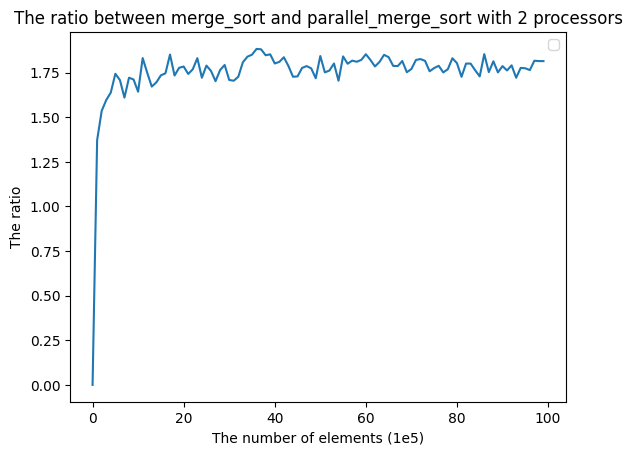

In [9]:
import matplotlib.pyplot as plt

graph2 = [j/i for i,j in zip(msp2,ms2)]
plt.title("The ratio between merge_sort and parallel_merge_sort with 2 processors")
plt.plot(graph2)
plt.xlabel('The number of elements (1e5)')
plt.ylabel('The ratio')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


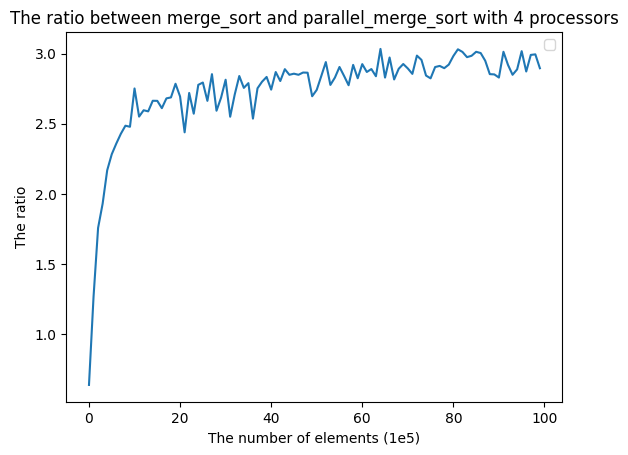

In [10]:
graph2 = [j/i for i,j in zip(msp4,ms4)]
plt.title("The ratio between merge_sort and parallel_merge_sort with 4 processors")
plt.plot(graph2)
plt.xlabel('The number of elements (1e5)')
plt.ylabel('The ratio')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


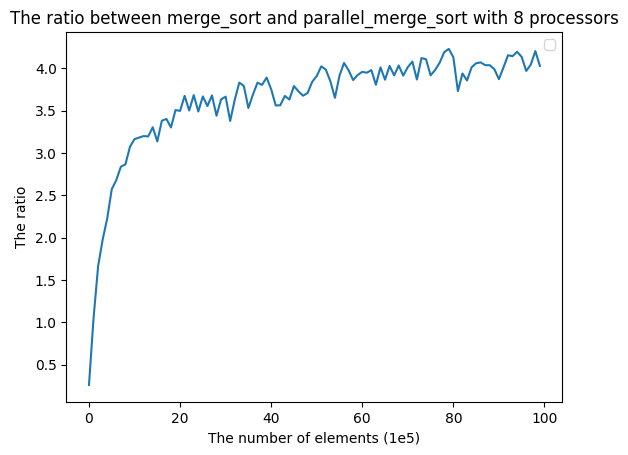

In [11]:
graph2 = [j/i for i,j in zip(msp8,ms8)]
plt.title("The ratio between merge_sort and parallel_merge_sort with 8 processors")
plt.plot(graph2)
plt.xlabel('The number of elements (1e5)')
plt.ylabel('The ratio')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


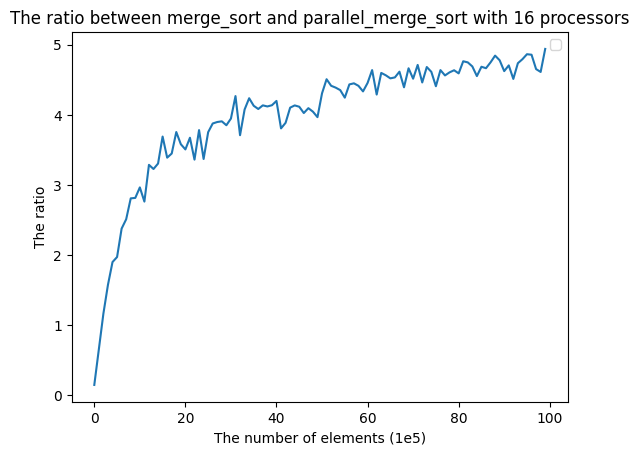

In [12]:
graph2 = [j/i for i,j in zip(msp16,ms16)]
plt.title("The ratio between merge_sort and parallel_merge_sort with 16 processors")
plt.plot(graph2)
plt.xlabel('The number of elements (1e5)')
plt.ylabel('The ratio')
plt.legend()
plt.show()